In [1]:
from pydataset import data
from sklearn.linear_model import LinearRegression

from scipy import stats
import evaluate

import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = data("tips")
x = 'total_bill'
y = 'tip'

def fit_predict_resid(df, x, y):
    ols_model = LinearRegression().fit(df[[x]], df[y])
    df['yhat'] = ols_model.predict(df[[x]])
    df['residual'] = df['yhat'] - df[y]
    
    return df

df = fit_predict_resid(df, x, y)

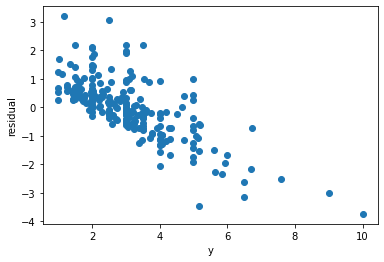

In [3]:
evaluate.plot_residuals(df.tip, df.yhat)

In [10]:
evaluate.regression_errors(df.tip, df.yhat)

SSE, ESS, TSS, MSE, RMSE, R2


(252.79, 212.42, 465.21, 1.04, 1.02, 0.46)

In [5]:
# mean baseline
evaluate.baseline_mean_errors(df.tip)

SSE, ESS, TSS, MSE, RMSE, R2


(465.21, 0.0, 465.21, 1.91, 1.38, 0.0)

In [6]:
#Yes bill model off by $1.02 on average, 'tis better than $1.38
evaluate.better_than_baseline(df.tip, df.yhat)

SSE, ESS, TSS, MSE, RMSE, R2
SSE, ESS, TSS, MSE, RMSE, R2


True

## Part Deux

In [7]:
mpg = data("mpg")

In [8]:
mpg = fit_predict_resid(mpg, 'displ', 'hwy')
mpg.head(2)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat,residual
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,29.342591,0.342591
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,29.342591,0.342591


In [11]:
# R^2 ~ .59 -> 59% of variance explained by model
# RMSE -> ~4 mpg off on avg.
evaluate.regression_errors(mpg.hwy, mpg.yhat)

SSE, ESS, TSS, MSE, RMSE, R2


(3413.83, 4847.83, 8261.66, 14.59, 3.82, 0.59)

In [12]:
# mean baseline is off by ~6 mpg on avg.
evaluate.baseline_mean_errors(mpg.hwy)

SSE, ESS, TSS, MSE, RMSE, R2


(8261.66, 0.0, 8261.66, 35.31, 5.94, 0.0)

In [13]:
#Lower RMSE -> better model
evaluate.better_than_baseline(mpg.hwy, mpg.yhat)

SSE, ESS, TSS, MSE, RMSE, R2
SSE, ESS, TSS, MSE, RMSE, R2


True